In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# K-NN Classification

In [46]:

import cv2
import statistics
import pandas as pd
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from math import sqrt
from scipy.io import loadmat
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [56]:
A=loadmat('/content/drive/MyDrive/PA_1/CIFAR10_Train.mat')
B=loadmat('/content/drive/MyDrive/PA_1/CIFAR10_Test.mat')


X_train=A['CIFAR10_Train_Data']
Y_train=A['CIFAR10_Train_Labels']
X_test=B['CIFAR10_Test_Data']
Y_test=B['CIFAR10_Test_Labels']


train_Red = np.zeros(1024)
train_Green = np.zeros(1024)
train_Blue = np.zeros(1024)


test_Red = np.zeros(1024)
test_Green = np.zeros(1024)
test_Blue = np.zeros(1024)

In [57]:
train_image = np.zeros((X_train.shape[0],32,32,3))
for i in range(0,X_train.shape[0]):
    d = X_train[i]
    red = d[:1024]
    green = d[1024:2*1024]
    blue = d[2*1024:]
    for j in range(0,32):
        train_image[i,j,:,0] = red[32*j:32*(j+1)]
        train_image[i,j,:,1] = green[32*j:32*(j+1)]
        train_image[i,j,:,2] = blue[32*j:32*(j+1)]


In [58]:
test_image = np.zeros((X_test.shape[0],32,32,3))
for i in range(0,X_test.shape[0]):
    d = X_test[i]
    red = d[:1024]
    green = d[1024:2*1024]
    blue = d[2*1024:]
    for j in range(0,32):
        test_image[i,j,:,0] = red[32*j:32*(j+1)]
        test_image[i,j,:,1] = green[32*j:32*(j+1)]
        test_image[i,j,:,2] = blue[32*j:32*(j+1)]


In [59]:
 def histogram(f):
    f = f.astype('uint8')
    histr = cv2.calcHist([f[:,:,0]],[0],None,[256],[0,256])
    histg = cv2.calcHist([f[:,:,1]],[0],None,[256],[0,256])
    histb = cv2.calcHist([f[:,:,2]],[0],None,[256],[0,256])
    hist = np.zeros((256*3,1))
    hist[:256] = histr
    hist[256:512] = histg
    hist[512:] = histb
    hist = hist.T
    return hist

In [61]:
def feature_extraction(x_train,x_test):
    x = np.zeros((x_train.shape[0],256*3))
    x_t = np.zeros((x_test.shape[0],256*3))
    for i in range(0,x_train.shape[0]):
        x[i,:] = histogram(x_train[i,:,:,:])
    for j in range(0,x_test.shape[0]):
        x_t[j,:] = histogram(x_test[j,:,:,:])
    return x,x_t


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy=[]
k=[1,3,5,9,11]
hist_X_train,hist_X_test = feature_extraction(train_image,test_image)
for i in k:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit( hist_X_train, Y_train )
    Y_pred = model.predict(hist_X_test)
    Y_pred=np.reshape(Y_pred,(500,1))
    acc = accuracy_score(Y_test, Y_pred, normalize=True, sample_weight=None)
    Accuracy.append(acc)



[0.224, 0.268, 0.24, 0.226, 0.252]


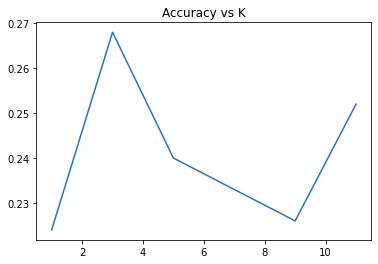

In [64]:
print(Accuracy)
plt.plot(k,Accuracy)
plt.title('Accuracy vs K')
plt.show()

In [113]:

class K_Nearest_Neighbors_Regressor_NCC() :
      def __init__( self, K ) :
          self.K = K
      def fit( self, X_train, Y_train ) :
          self.X_train = X_train
          self.Y_train = Y_train
          self.m, self.n = X_train.shape
      def predict( self, X_test ) :
          self.X_test = X_test
          self.m_test, self.n = X_test.shape
          Y_predict = []
          for i in range( self.m_test ) :
              x = self.X_test[i]
              neighbors = np.zeros( self.K )
              neighbors = self.find_neighbors( x )
              neighbours=[]
              for z in range(self.K):
                  neighbours.append(neighbors[z][0])
              unique, counts = np.unique(neighbors, return_counts=True)
              mode = unique[np.argmax(counts)]
              Y_predict.append(mode)
 
          return Y_predict
      def find_neighbors( self, x ) :
          NCC_distances = np.zeros( self.m )
          for i in range( self.m ) :
              d = self.NCC( x, self.X_train[i] )
              NCC_distances[i] = d
          inds = NCC_distances.argsort()
          Y_train_sorted = self.Y_train[inds]
          return Y_train_sorted[0:self.K]
      def NCC( self, x, x_train ) :
          return 1 - np.correlate(x, x_train)/np.sqrt(np.correlate(x_train,x_train)*np.correlate(x,x))


Accuracy with k= 1 is 0.236
Accuracy with k= 3 is 0.26
Accuracy with k= 5 is 0.232
Accuracy with k= 9 is 0.236
Accuracy with k= 11 is 0.224


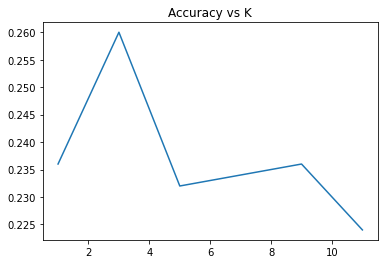

In [115]:
Accuracy=[]
k=[1,3,5,9,11]
hist_X_train,hist_X_test = feature_extraction(train_image,test_image)
X_NCC = (hist_X_train-np.mean(hist_X_train)/(np.std(hist_X_train)))
X_test_NCC = (hist_X_test-np.mean(hist_X_test)/(np.std(hist_X_test)))

for i in k:
    model = K_Nearest_Neighbors_Regressor_NCC( K = i )
    model.fit( X_NCC, Y_train )
    Y_pred = model.predict(X_test_NCC)
    Y_pred=np.reshape(Y_pred,(500,1))
    acc = accuracy_score(Y_test, Y_pred, normalize=True, sample_weight=None)
    print('Accuracy with k=',i,'is',acc)
    Accuracy.append(acc)
plt.plot(k,Accuracy)
plt.title('Accuracy vs K')
plt.show()
